<a href="https://colab.research.google.com/github/Thisun1997/Pytorch_basics/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision   #utilities to work with image data and download popular datasets
from torchvision.datasets import MNIST

In [ ]:
dataset = MNIST(root="data/",download=True) #for training

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(dataset)

60000

In [ ]:
test_dataset =  MNIST(root="data/",train=False)

In [ ]:
len(test_dataset)

10000

In [ ]:
#sample element
dataset[0]   #pair containing 28x28 px image which is a part of python imaging library and a lable

(<PIL.Image.Image image mode=L size=28x28 at 0x7F21BBE20C90>, 5)

In [ ]:
#plotting the image
import matplotlib.pyplot as plt

#sketch the image on the notebook iteslf
%matplotlib inline 

Label 5


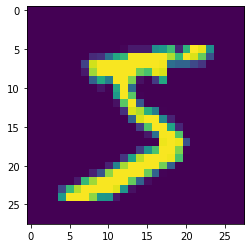

In [ ]:
image,label = dataset[0]
plt.imshow(image)
print("Label",label)

In [ ]:
import torchvision.transforms as transforms #to convert images to tensors

In [ ]:
data_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor()])
train_dataset = MNIST(root="data/", train=True,transform=data_transform)
# train_dataset = MNIST(root="data/",train=True,transform=transforms.ToTensor())

In [ ]:
img_tensor,label = train_dataset[1]
print(img_tensor.shape,label)   #1-color scale. 28x28-pixels

torch.Size([1, 28, 28]) 0


In [ ]:
print(img_tensor[:,5:10,5:10])
print(torch.max(img_tensor),torch.min(img_tensor)) #1-darkets,0-lightest

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
tensor(1.) tensor(0.)


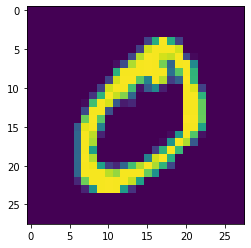

In [ ]:
plt.imshow(img_tensor[0])

In [ ]:
import numpy as np

def split_indices(n,fraction):
  n_val = int(n*fraction)
  idx = np.random.permutation(n)
  return idx[n_val:],idx[:n_val]

train_ids,val_ids = split_indices(len(train_dataset),0.2)

In [ ]:
print(len(train_ids),len(val_ids))

48000 12000


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size = 100

#create training set
train_sampler = SubsetRandomSampler(train_ids)
train_loader = DataLoader(train_dataset,batch_size,train_sampler)

#create validation set
val_sampler = SubsetRandomSampler(val_ids)
val_loader = DataLoader(train_dataset,batch_size,val_sampler)

In [ ]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#logistic regression model
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [ ]:
#get the prediction for 1st batch
for x,y in train_loader:
  outputs = model(x)
  break

#convert output to probabilities using softmax
import torch.nn.functional as F
probs = F.softmax(outputs,dim=1)
max_prob,preds = torch.max(probs,dim=1)

In [ ]:
print(preds)


tensor([1, 1, 5, 5, 5, 1, 5, 4, 5, 7, 5, 0, 1, 4, 7, 6, 4, 1, 6, 5, 5, 5, 8, 1,
        1, 5, 1, 0, 1, 7, 1, 1, 5, 3, 1, 5, 4, 7, 1, 6, 3, 3, 5, 6, 4, 1, 5, 4,
        0, 4, 1, 0, 1, 1, 1, 3, 3, 5, 1, 5, 5, 5, 4, 3, 5, 1, 5, 0, 1, 1, 5, 5,
        5, 4, 3, 3, 1, 4, 6, 4, 3, 5, 1, 1, 1, 5, 9, 5, 1, 1, 5, 1, 5, 1, 5, 5,
        5, 5, 5, 3])


In [ ]:
print(y)

tensor([7, 2, 1, 4, 5, 4, 4, 4, 3, 9, 5, 2, 3, 6, 1, 2, 4, 7, 8, 6, 0, 0, 5, 4,
        1, 0, 3, 5, 1, 8, 4, 4, 3, 9, 2, 8, 9, 9, 8, 8, 2, 7, 6, 9, 2, 1, 8, 7,
        7, 1, 2, 5, 6, 4, 4, 7, 6, 1, 4, 3, 0, 5, 2, 5, 3, 0, 6, 9, 1, 7, 1, 9,
        9, 7, 2, 7, 0, 2, 8, 4, 3, 3, 1, 8, 7, 6, 3, 6, 2, 1, 4, 4, 9, 3, 6, 6,
        0, 1, 2, 8])


**CROSS ENTROPY** as the loss function
</br>
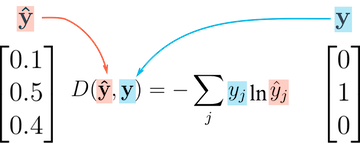


In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs,y)  #direct output from model is the input
print(loss)

tensor(2.3168, grad_fn=<NllLossBackward>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. The lower the loss, The better the model.

In [ ]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr)

In [ ]:
def loss_batch(model,loss_fn,x,y,opt=None,metric=None):
  preds = model(x)
  loss = loss_fn(preds,y)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  metric_result = None
  if metric is not None:
    metric_result = metric(preds,y)
  
  return loss.item(),len(x),metric_result

In [ ]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  results = [loss_batch(model,loss_fn,x,y,optimizer,metric=metric) for x,y in valid_dl]
  losses,nums,metrics = zip(*results)
  total = np.sum(nums)

  avg_loss = np.sum(np.multiply(losses,nums))/total
  avg_metric = None
  if metric is not None:
    avg_metric = np.sum(np.multiply(metrics,nums))/total
  return avg_loss,total,avg_metric

In [ ]:
def accuracy(outputs,label):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds == label).item()/len(preds)

In [ ]:
val_loss,total,val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)

In [ ]:
print(val_loss,total,val_acc)

2.015551137129466 60000 0.5262666666666667


In [ ]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(epochs):
    #train
    for x,y in train_dl:
      loss,_,_ = loss_batch(model,loss_fn,x,y,opt)

    #validation
    val_loss,total,val_metric = evaluate(model,loss_fn,valid_dl,metric)

    #print progress
    if metric is None:
      print("epoch [{}/{}], Loss: {:.4f}".format(epoch+1,epochs,val_loss))
    else:
      print("epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}".format(epoch+1,epochs,val_loss,metric.__name__,val_metric))


In [ ]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr) 

In [ ]:
fit(5,model,loss_fn,optimizer,train_loader,val_loader,metric=accuracy)

epoch [1/5], Loss: 1.6221, accuracy: 0.7408
epoch [2/5], Loss: 1.1772, accuracy: 0.8022
epoch [3/5], Loss: 0.9627, accuracy: 0.8233
epoch [4/5], Loss: 0.8397, accuracy: 0.8339
epoch [5/5], Loss: 0.7598, accuracy: 0.8415


In [ ]:
test_dataset = MNIST(root="data/",train=False,transform=transforms.ToTensor())

In [ ]:
def predict_image(img, model):
    xt = img.unsqueeze(0)  #make 1x28x28 to 1x1x28x28 tensor
    yt = model(xt)
    _, preds = torch.max(yt, dim=1)
    return preds[0].item()

label: 9 prediction: 7


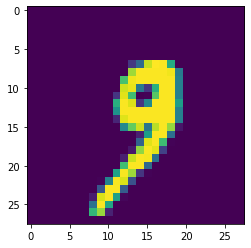

In [ ]:
img,label = test_dataset[1000]
pred = predict_image(img,model)

print("label: {} prediction: {}".format(label,pred))
plt.imshow(img[0])


In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
loss,total,acc = evaluate(model,loss_fn,test_loader,accuracy)
print("Loss: {:.4f} Accuracy: {:.4f}".format(loss,acc))

Loss: 0.7147 Accuracy: 0.8544


save the model

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth') #.state_dict returns an ordered dictionary with weights and biases

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0325,  0.0089, -0.0147,  ..., -0.0295, -0.0183,  0.0191],
                      [-0.0280, -0.0111, -0.0233,  ...,  0.0165,  0.0110, -0.0110],
                      [ 0.0086,  0.0032,  0.0281,  ...,  0.0153, -0.0247, -0.0104],
                      ...,
                      [ 0.0299,  0.0237,  0.0329,  ..., -0.0357, -0.0354,  0.0136],
                      [-0.0091, -0.0090,  0.0141,  ...,  0.0224,  0.0035, -0.0138],
                      [-0.0289,  0.0212, -0.0153,  ...,  0.0162, -0.0125, -0.0256]])),
             ('linear.bias',
              tensor([-0.0278,  0.0868,  0.0070, -0.0216,  0.0409,  0.0225, -0.0374,  0.0164,
                      -0.0434, -0.0480]))])

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0325,  0.0089, -0.0147,  ..., -0.0295, -0.0183,  0.0191],
                      [-0.0280, -0.0111, -0.0233,  ...,  0.0165,  0.0110, -0.0110],
                      [ 0.0086,  0.0032,  0.0281,  ...,  0.0153, -0.0247, -0.0104],
                      ...,
                      [ 0.0299,  0.0237,  0.0329,  ..., -0.0357, -0.0354,  0.0136],
                      [-0.0091, -0.0090,  0.0141,  ...,  0.0224,  0.0035, -0.0138],
                      [-0.0289,  0.0212, -0.0153,  ...,  0.0162, -0.0125, -0.0256]])),
             ('linear.bias',
              tensor([-0.0278,  0.0868,  0.0070, -0.0216,  0.0409,  0.0225, -0.0374,  0.0164,
                      -0.0434, -0.0480]))])